In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv('USArrests.csv',index_col = 0)

In [4]:
df

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


In [5]:
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [6]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


In [9]:
sc = MinMaxScaler((0,1))
df = sc.fit_transform(df)

In [10]:
kmeans = KMeans(n_clusters=4).fit(df)

c:\Users\s7522\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [11]:
kmeans.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 4,
 'n_init': 'warn',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [12]:
kmeans.cluster_centers_

array([[0.30439405, 0.32937147, 0.70588235, 0.31098951],
       [0.79141566, 0.6802226 , 0.36864407, 0.36466408],
       [0.1686747 , 0.11485774, 0.34028683, 0.12601868],
       [0.6124498 , 0.75      , 0.75423729, 0.67980189]])

In [13]:
kmeans.labels_

array([1, 3, 3, 1, 3, 3, 0, 0, 3, 1, 0, 2, 3, 0, 2, 0, 2, 1, 2, 3, 0, 3,
       2, 1, 0, 2, 2, 3, 2, 0, 3, 3, 1, 2, 0, 0, 0, 0, 0, 1, 2, 1, 3, 0,
       2, 0, 0, 2, 2, 0])

In [14]:
kmeans.inertia_

3.683456153585914

In [15]:
kmeans = KMeans()
ssd = []
K = range(1, 30)

In [16]:
for k in K:
    kmeans = KMeans(n_clusters=k).fit(df)
    ssd.append(kmeans.inertia_)

c:\Users\s7522\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\s7522\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


c:\Users\s7522\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\s7522\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\s7522\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\s7522\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

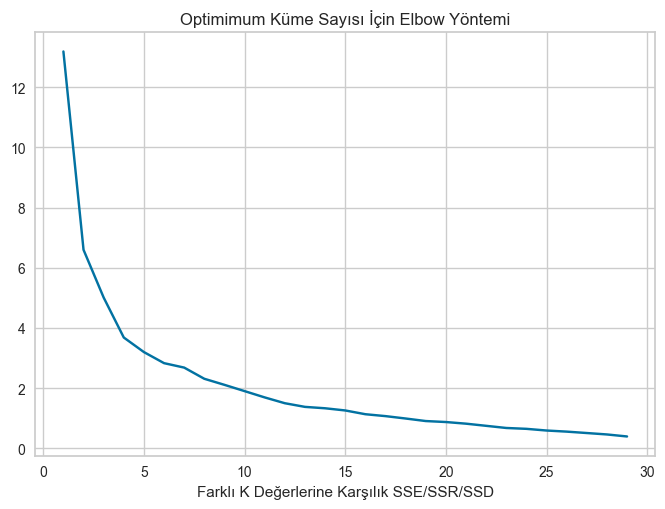

In [17]:
plt.plot(K, ssd, 'bx-')
plt.xlabel('Farklı K Değerlerine Karşılık SSE/SSR/SSD')
plt.title('Optimimum Küme Sayısı İçin Elbow Yöntemi')
plt.show()

c:\Users\s7522\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\s7522\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\s7522\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\s7522\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

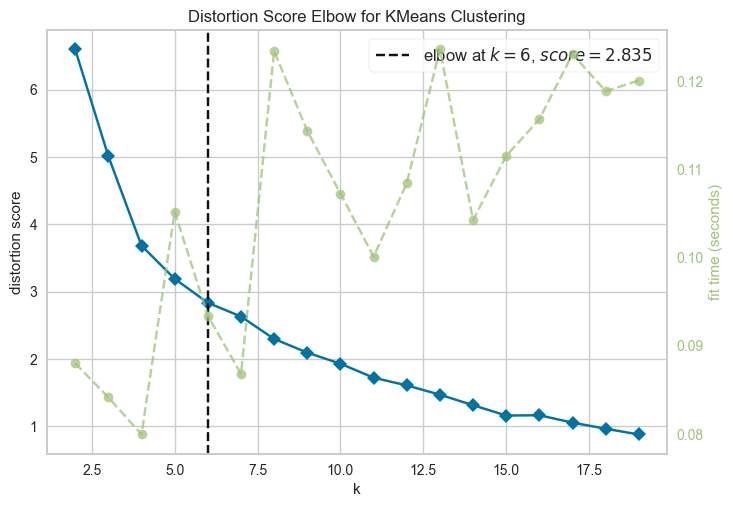

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
kmeans = KMeans()
elbow = KElbowVisualizer(kmeans, k=(2, 20))
elbow.fit(df)
elbow.show()

In [19]:
elbow.elbow_value_

6

In [20]:
kmeans = KMeans(n_clusters=elbow.elbow_value_).fit(df)


c:\Users\s7522\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [21]:
kmeans.n_clusters

6

In [22]:
kmeans.cluster_centers_

array([[0.2383821 , 0.268591  , 0.84503632, 0.2266519 ],
       [0.5686747 , 0.70205479, 0.71864407, 0.87028424],
       [0.83562823, 0.70645793, 0.37772397, 0.37172388],
       [0.13805221, 0.10616438, 0.34039548, 0.1171404 ],
       [0.64371773, 0.78424658, 0.77966102, 0.54374308],
       [0.37700803, 0.36957763, 0.56073446, 0.35400517]])

In [23]:
kmeans.labels_

array([2, 1, 4, 5, 1, 1, 0, 5, 4, 2, 0, 3, 4, 5, 3, 5, 5, 2, 3, 4, 0, 1,
       3, 2, 5, 3, 3, 1, 3, 0, 4, 4, 2, 3, 5, 5, 5, 0, 0, 2, 3, 2, 4, 0,
       3, 5, 5, 3, 3, 5])

In [24]:
clusters = kmeans.labels_

In [25]:
df = pd.read_csv('C:/Users/s7522/Desktop/Miuul Bootcamp/machine_learning/datasets/USArrests.csv',index_col = 0)

In [26]:
df['cluster'] = clusters

In [27]:
df['cluster'] = df['cluster'] + 1

In [28]:
df

,Murder,Assault,UrbanPop,Rape,cluster
Alabama,13.2,236,58,21.2,3
Alaska,10.0,263,48,44.5,2
Arizona,8.1,294,80,31.0,5
Arkansas,8.8,190,50,19.5,6
California,9.0,276,91,40.6,2
Colorado,7.9,204,78,38.7,2
Connecticut,3.3,110,77,11.1,1
Delaware,5.9,238,72,15.8,6
Florida,15.4,335,80,31.9,5
Georgia,17.4,211,60,25.8,3


In [29]:
df[df['cluster'] == 1]

,Murder,Assault,UrbanPop,Rape,cluster
Connecticut,3.3,110,77,11.1,1
Hawaii,5.3,46,83,20.2,1
Massachusetts,4.4,149,85,16.3,1
New Jersey,7.4,159,89,18.8,1
Pennsylvania,6.3,106,72,14.9,1
Rhode Island,3.4,174,87,8.3,1
Utah,3.2,120,80,22.9,1


In [30]:
df[df['cluster'] == 2]

,Murder,Assault,UrbanPop,Rape,cluster
Alaska,10.0,263,48,44.5,2
California,9.0,276,91,40.6,2
Colorado,7.9,204,78,38.7,2
Michigan,12.1,255,74,35.1,2
Nevada,12.2,252,81,46.0,2


In [31]:
df[df['cluster'] == 3]

,Murder,Assault,UrbanPop,Rape,cluster
Alabama,13.2,236,58,21.2,3
Georgia,17.4,211,60,25.8,3
Louisiana,15.4,249,66,22.2,3
Mississippi,16.1,259,44,17.1,3
North Carolina,13.0,337,45,16.1,3
South Carolina,14.4,279,48,22.5,3
Tennessee,13.2,188,59,26.9,3


In [32]:
df[df['cluster'] == 4]

,Murder,Assault,UrbanPop,Rape,cluster
Idaho,2.6,120,54,14.2,4
Iowa,2.2,56,57,11.3,4
Maine,2.1,83,51,7.8,4
Minnesota,2.7,72,66,14.9,4
Montana,6.0,109,53,16.4,4
Nebraska,4.3,102,62,16.5,4
New Hampshire,2.1,57,56,9.5,4
North Dakota,0.8,45,44,7.3,4
South Dakota,3.8,86,45,12.8,4
Vermont,2.2,48,32,11.2,4


In [33]:
df[df['cluster'] == 5]

,Murder,Assault,UrbanPop,Rape,cluster
Arizona,8.1,294,80,31.0,5
Florida,15.4,335,80,31.9,5
Illinois,10.4,249,83,24.0,5
Maryland,11.3,300,67,27.8,5
New Mexico,11.4,285,70,32.1,5
New York,11.1,254,86,26.1,5
Texas,12.7,201,80,25.5,5


In [34]:
df.groupby('cluster').agg(['count','mean','median'])

Murder                   Assault                    UrbanPop  \
         count       mean median   count        mean median    count   
cluster                                                                
1            7   4.757143    4.4       7  123.428571  120.0        7   
2            5  10.240000   10.0       5  250.000000  255.0        5   
3            7  14.671429   14.4       7  251.285714  249.0        7   
4           12   3.091667    2.6      12   76.000000   76.5       12   
5            7  11.485714   11.3       7  274.000000  285.0        7   
6           12   7.058333    7.0      12  152.916667  153.5       12   

                           Rape                    
              mean median count       mean median  
cluster                                            
1        81.857143   83.0     7  16.071429  16.30  
2        74.400000   78.0     5  40.980000  40.60  
3        54.285714   58.0     7  21.685714  22.20  
4        52.083333   53.5    12  11.833333  11.25  
5        78.000000   80.0     7  28.342857  27.80  
6        65.083333   66.5    12  21.000000  20.35

In [35]:
df.to_csv('clusters.csv')

In [37]:
sc = MinMaxScaler((0, 1))
df = sc.fit_transform(df)

In [38]:
hc_average = linkage(df, 'average')

In [43]:
hc_complete = linkage(df, 'complete')

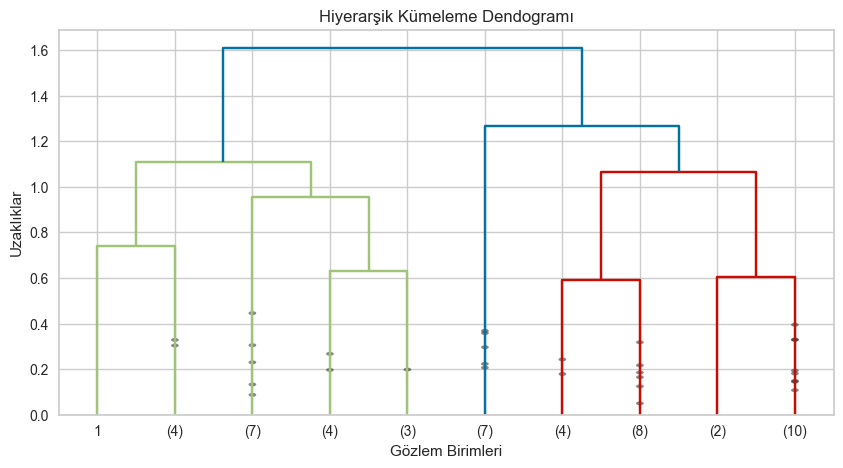

In [44]:
plt.figure(figsize=(10,5))
plt.title('Hiyerarşik Kümeleme Dendogramı')
plt.xlabel('Gözlem Birimleri')
plt.ylabel('Uzaklıklar')
dendrogram(hc_complete,
           truncate_mode='lastp',
           p=10,
           show_contracted=True,
           leaf_font_size=10)
plt.show()

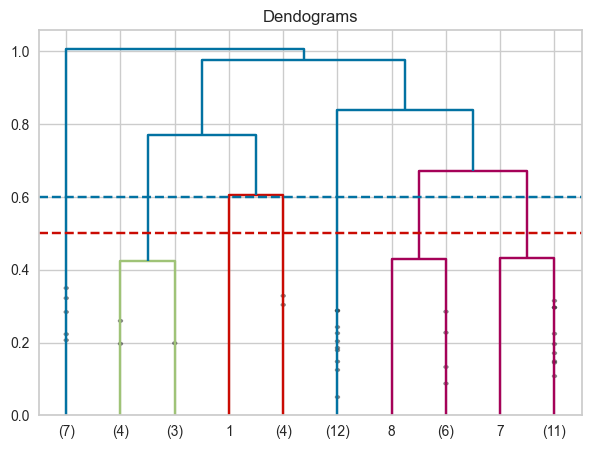

In [46]:
plt.figure(figsize=(7,5))
plt.title('Dendograms')
dend = dendrogram(hc_average, 
                  truncate_mode='lastp',
                  p=10,
                  show_contracted=True,
                  leaf_font_size=10)
plt.axhline(y=0.5, color='r', linestyle='--')
plt.axhline(y=0.6, color='b', linestyle='--')
plt.show()

In [47]:
#Final Model

In [48]:
from sklearn.cluster import AgglomerativeClustering

In [49]:
cluster = AgglomerativeClustering(n_clusters=5, linkage='average')

In [50]:
clusters = cluster.fit_predict(df)

In [51]:
clusters

array([1, 2, 0, 0, 2, 2, 4, 0, 0, 1, 4, 3, 0, 0, 3, 0, 0, 1, 3, 0, 4, 2,
       3, 1, 0, 3, 3, 2, 3, 4, 0, 0, 1, 3, 0, 0, 0, 4, 4, 1, 3, 1, 0, 4,
       3, 0, 0, 3, 3, 0], dtype=int64)

In [52]:
df = pd.read_csv('C:/Users/s7522/Desktop/Miuul Bootcamp/machine_learning/datasets/Hitters.csv')

In [53]:
num_cols = [col for col in df.columns if df[col].dtypes != 'O' and 'Salary' not in col]

In [54]:
df = df[num_cols]
df.dropna(inplace=True)


In [55]:
df.shape

(322, 16)

In [56]:
df = StandardScaler().fit_transform(df)

In [57]:
pca = PCA()
pca_fit = pca.fit_transform(df)

In [58]:
pca_fit

array([[-3.24010642e+00, -2.53173003e-01,  7.76065846e-01, ...,
         1.93690233e-02,  1.02548346e-02, -2.79525472e-03],
       [ 2.45487952e-01,  1.30295065e+00,  1.18039708e-01, ...,
         1.09247338e-01,  4.53408016e-02, -2.36402647e-02],
       [ 6.03883380e-01, -2.61700162e+00, -6.98183038e-01, ...,
         4.09706616e-02,  1.23977727e-02, -8.67195207e-03],
       ...,
       [-9.51441568e-01, -9.10086229e-01,  2.86517304e-01, ...,
        -6.39072785e-02,  6.55138389e-02,  1.69447197e-02],
       [ 2.09147322e+00, -2.26582646e+00, -1.92745130e-01, ...,
        -3.92784572e-02,  9.78598625e-03, -1.05914910e-02],
       [ 1.90562177e+00, -3.11197919e-01, -3.56249054e-01, ...,
        -2.89222410e-01, -7.41336701e-02, -2.76080922e-02]])

In [59]:
pca.explained_variance_ratio_

array([4.60378552e-01, 2.60398491e-01, 1.03388605e-01, 5.36902121e-02,
       4.20784091e-02, 2.96359092e-02, 1.57079101e-02, 1.13928108e-02,
       7.83230398e-03, 5.87669497e-03, 3.74765194e-03, 3.09384056e-03,
       1.55679403e-03, 8.59034766e-04, 2.86873704e-04, 7.59064046e-05])

In [60]:
np.cumsum(pca.explained_variance_ratio_)

array([0.46037855, 0.72077704, 0.82416565, 0.87785586, 0.91993427,
       0.94957018, 0.96527809, 0.9766709 , 0.9845032 , 0.9903799 ,
       0.99412755, 0.99722139, 0.99877819, 0.99963722, 0.99992409,
       1.        ])

In [61]:
#Optimum Bileşen Sayısı

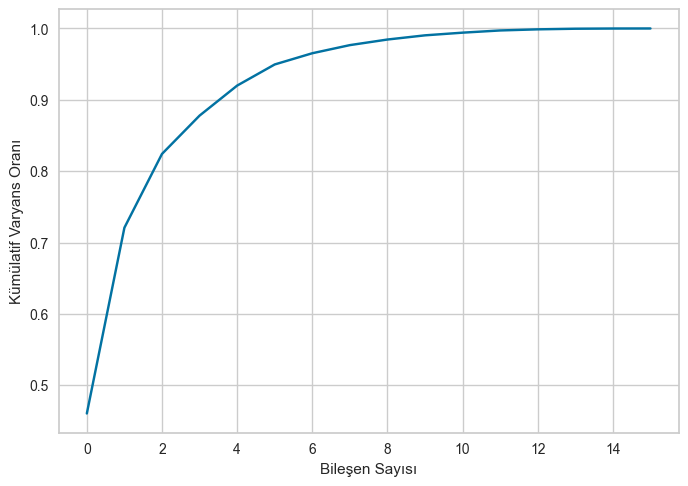

In [63]:
pca = PCA()
pca_fit = pca.fit_transform(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Bileşen Sayısı')
plt.ylabel('Kümülatif Varyans Oranı')
plt.show()

In [65]:
pca = PCA(n_components=3)
pca_fit = pca.fit_transform(df)
pca.explained_variance_ratio_

array([0.46037855, 0.26039849, 0.1033886 ])